# Data Generation

In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## 1. Four Random Functions

In [2]:
def logit(x, position = 0.5, spread = -20):
    return (1/(1+np.exp(spread * (x - position))))

In [3]:
def gauss(x, position = 0.5, deviation = 0.1):
    return (np.exp(-np.power(x - position, 2.) / (2 * np.power(deviation, 2.))))

In [4]:
def winner(x, position = None):
    xPoints = np.linspace(0, 1, 5)
    yPoints = [1, 0, 0.5, 0, 1]
    h = interp1d(xPoints, yPoints)
    return h(x)

In [5]:
def sine(x, position = 0.5):
    return (np.sin(10*x + position))*0.5+0.5

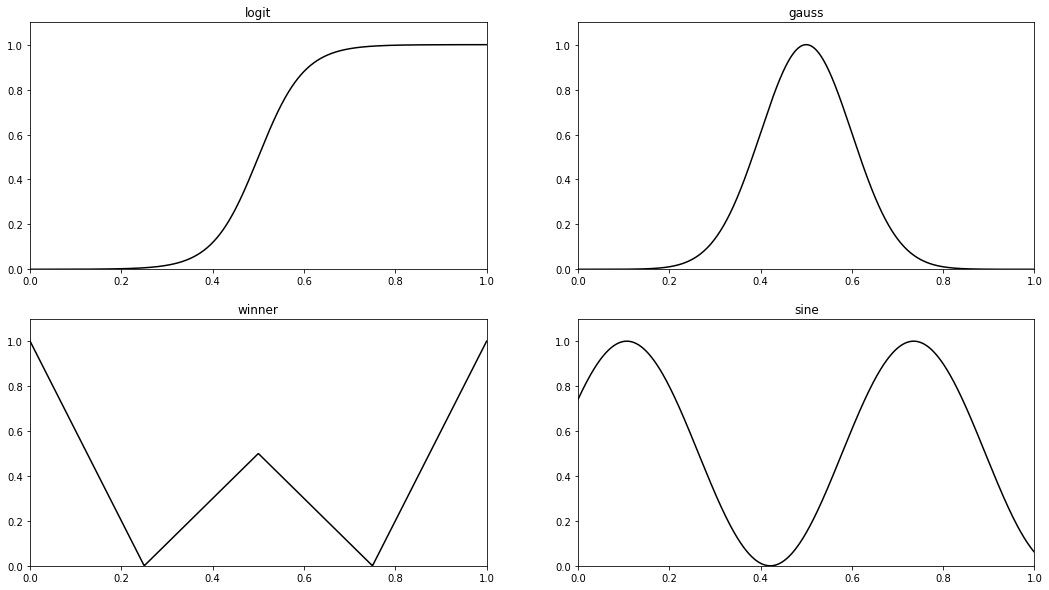

In [6]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
for i, f in enumerate([logit, gauss, winner, sine]):
    ax = fig.add_subplot(221+i)
    ax.set_title(f.__name__)
    ax.plot(x, f(x), '-k')
    ax.set_xlim(0,1); ax.set_ylim(0,1.1)
plt.show()

## 2. Create Distributions

In [62]:
def generateDistribution(function, noise=lambda x: 0, size=1):
    if(size==1):
        x = np.random.rand()
        y = function(x) + noise(x)
        if(np.random.rand() <= y): return x
        return(generateDistribution(function))
    else: return(np.array([generateDistribution(function) for _ in range(size)]))

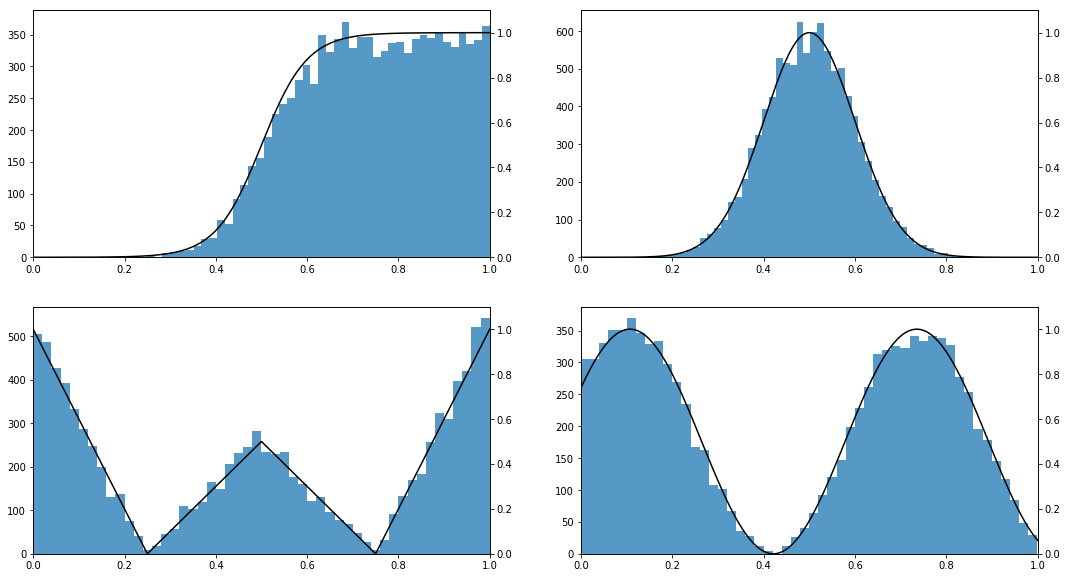

In [65]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
mean, stdev = [], []
for i, f in enumerate([logit, gauss, winner, sine]):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    population = generateDistribution(f, None, 10000)
    ax.hist(population, bins=50, alpha=0.75)
    mean.append(np.mean(population))
    stdev.append(np.std(population))
    ax2.plot(x, f(x), '-k')
    ax2.set_xlim(0,1); ax2.set_ylim(0,1.1)
plt.show()

## 3. Central Limit Theorem

In [13]:
SIZE = 5
SAMPLES = 10000
ZSCORE = 1.96

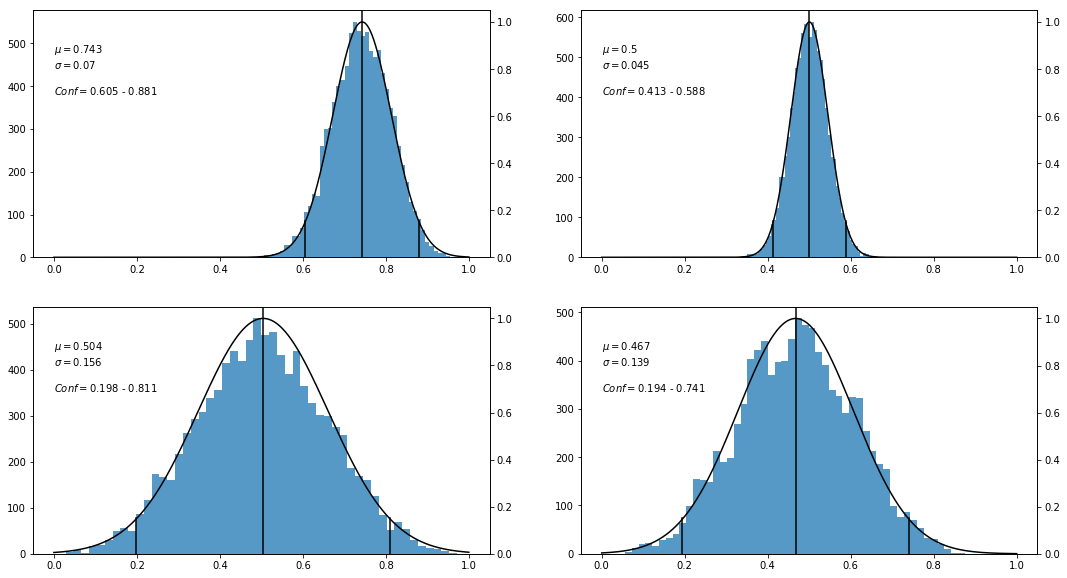

In [66]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))
for i, f in enumerate([logit, gauss, winner, sine]):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    
    samplemeans = [generateDistribution(f, None, SIZE).mean() for _ in range(SAMPLES)]
    se = stdev[i] / np.sqrt(SIZE)
    ci = (mean[i]-ZSCORE*se, mean[i]+ZSCORE*se)
    
    ax.hist(samplemeans, bins=50, alpha=0.75)
    ax2.plot(x, gauss(x, mean[i], se), '-k'); ax2.set_ylim(0,)
    ax2.text(0, 0.7, r'$\mu =$' + str(round(mean[i], 3)) + '\n' + r'$\sigma =$' + str(round(se, 3)) +
            '\n\n' + r'$Conf = $' + str(round(ci[0], 3)) + ' - ' + str(round(ci[1], 3)))
    
    ax2.axvline(x=ci[0], color='k', ymax=gauss(ci[0], mean[i], se))
    ax2.axvline(x=ci[1], color='k', ymax=gauss(ci[1], mean[i], se))
    ax2.axvline(x=mean[i], color='k', ymax=gauss(mean[i], mean[i], se))
plt.show()

## 4. Random Jitter

In [67]:
def noise(x, c=1):
    n = np.random.randint(5, 20)
    r = [np.random.randint(20, 80) for _ in range(n*2)]
    jitter = 0
    for i in range(n):
        jitter += np.sin(r[i]*x) / float(r[i+1])
    return c * jitter

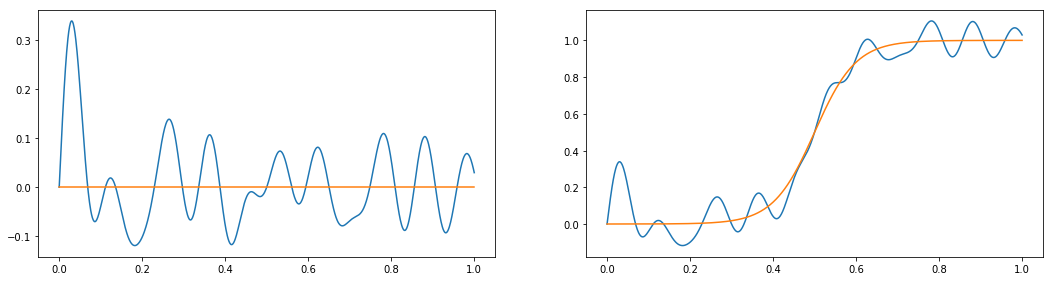

In [100]:
x = np.linspace(0,1, num=1001)
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
n = noise(x)
ax1.plot(x, n, x, np.zeros(len(x)))
ax2.plot(x, logit(x)+n, x, logit(x))
plt.show()

## 5. Generate Data

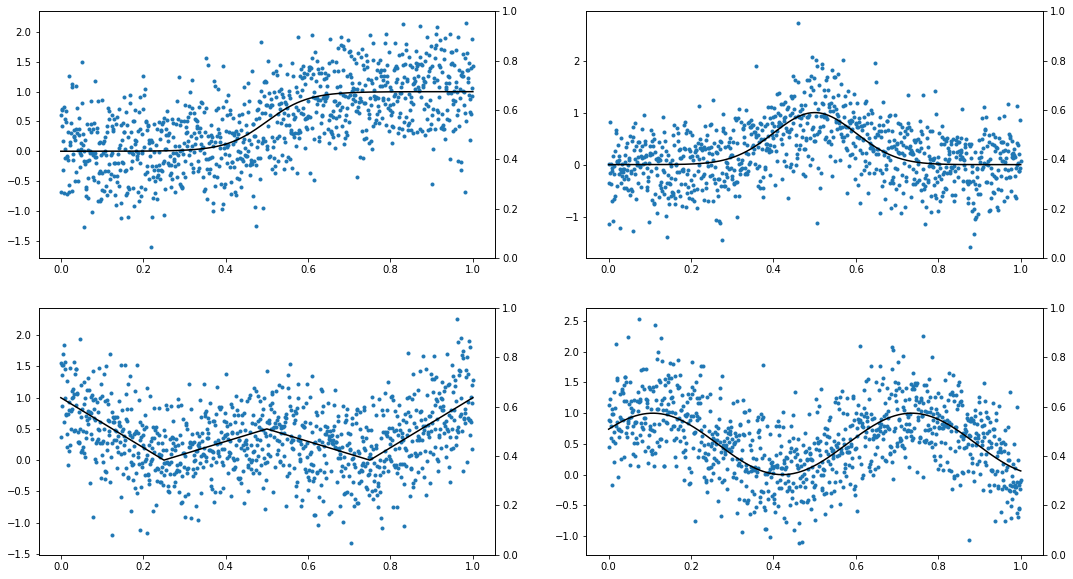

In [105]:
x = np.linspace(0, 1, num=1000)
fig = plt.figure(figsize=(18, 10))

for i, f in enumerate([logit, gauss, winner, sine]):
    ax = fig.add_subplot(221+i); ax2 = ax.twinx()
    population = [f(x) + noise(x, 0) + np.random.normal()*0.5 for x in x]
    ax.plot(x, f(x) + noise(x, 0), '-k')
    ax.scatter(x, population, marker='.')
plt.show()